# 1. Import Libary 

In [3]:
import pandas as pd
import pyodbc
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 2. Connection to SQL Server

In [4]:
conn = pyodbc.connect( #CONNECTION
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost\SQLEXPRESS;"
    "DATABASE=vti_data;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;")

df = pd.read_sql_query(
'''                                        
SELECT *
FROM  [vti_data].[dbo].[1.Shop_Customers];                         
''', conn)
df


<>:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Users\Hiep\AppData\Local\Temp\ipykernel_10440\120218828.py:3: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  "SERVER=localhost\SQLEXPRESS;"
C:\Users\Hiep\AppData\Local\Temp\ipykernel_10440\120218828.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(


,CustomerID,Genre,Age,Annual_Income_k,Spending_Score_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# 3. Data Cleaning Process

## 3.1 Remove Duplicate Rows

In [5]:
df.duplicated().sum()
# No duplicated rows found

np.int64(0)

## 3.2 Detect & Remove Outliers Using IQR

In [6]:
df.describe()

,CustomerID,Age,Annual_Income_k,Spending_Score_1_100
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Boxplot of Annual Income (k$)')

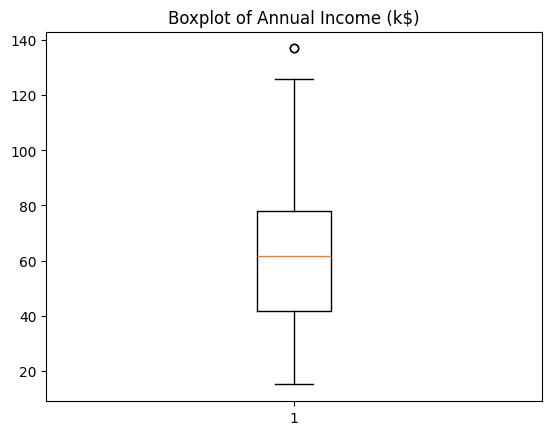

In [7]:
#Detect outliers using boxplot method
import matplotlib.pyplot as plt
plt.boxplot(df['Annual_Income_k'])
plt.title('Boxplot of Annual Income (k$)')

#No significant outliers detected

Text(0.5, 1.0, 'Boxplot of Spending Score (1-100)')

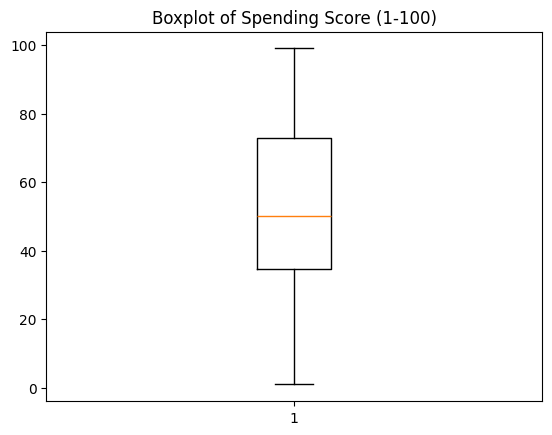

In [8]:
#Detect outliers using boxplot method
import matplotlib.pyplot as plt
plt.boxplot(df['Spending_Score_1_100'])
plt.title('Boxplot of Spending Score (1-100)')

#No significant outliers detected

## 3.4 Standardization Capitalization

In [9]:
#Rename columns
df = df.rename(columns={'Annual_Income_k': 'AnnualIncome', 'Spending_Score_1_100': 'SpendingScore'})

## 3.5 Covert Data Type

In [10]:
df['CustomerID'] = df['CustomerID'].astype(str)
df['Age'] = df['Age'].astype(int)
df['AnnualIncome'] = df['AnnualIncome'].astype(float)

## 3.10 Handle Missing Value

In [11]:
df.isnull().sum()
#No missing values found

CustomerID       0
Genre            0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

# 4. Feature Engineering 

In [12]:
df['Ratio'] = df['SpendingScore'] / df['AnnualIncome']
df

,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Ratio
0,1,Male,19,15.0,39,2.600000
1,2,Male,21,15.0,81,5.400000
2,3,Female,20,16.0,6,0.375000
3,4,Female,23,16.0,77,4.812500
4,5,Female,31,17.0,40,2.352941
...,...,...,...,...,...,...
195,196,Female,35,120.0,79,0.658333
196,197,Female,45,126.0,28,0.222222
197,198,Male,32,126.0,74,0.587302
198,199,Male,32,137.0,18,0.131387


# 5. K_Means Cluster With Behavior Spending

## 1. Find the optimal number of clusters using the Elbow Method.


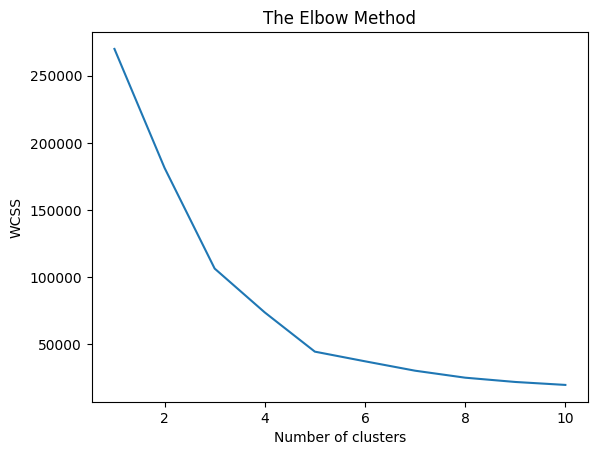

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = df[['AnnualIncome','SpendingScore']]

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#From the elbow plot, the optimal number of clusters is 5

## 2. Apply K_Means

In [14]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [15]:
y_kmeans

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [16]:
#Centroids of the clusters
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

## 3. Visualizing the clusters

In [17]:
y_kmeans.shape

(200,)

In [18]:
X.shape

(200, 2)

C:\Users\Hiep\AppData\Local\Temp\ipykernel_10440\1471329793.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


Text(0, 0.5, 'Spending Ratings (1-100)')

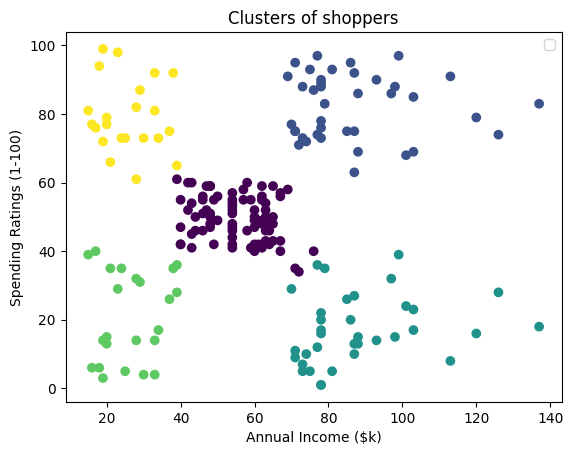

In [ ]:
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c= y_kmeans ) #colors được xác định bằng cluster
plt.title('Clusters of shoppers')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Ratings (1-100)')

In [40]:
df['label'] = y_kmeans
df['Ratio'] = df['SpendingScore'] / df['AnnualIncome']
df

,CustomerID,Genre,Age,AnnualIncome,SpendingScore,Ratio,label
0,1,Male,19,15.0,39,2.600000,3
1,2,Male,21,15.0,81,5.400000,4
2,3,Female,20,16.0,6,0.375000,3
3,4,Female,23,16.0,77,4.812500,4
4,5,Female,31,17.0,40,2.352941,3
...,...,...,...,...,...,...,...
195,196,Female,35,120.0,79,0.658333,1
196,197,Female,45,126.0,28,0.222222,2
197,198,Male,32,126.0,74,0.587302,1
198,199,Male,32,137.0,18,0.131387,2


# 6. Save Processed Data to Database for Visualization

In [42]:
import pyodbc

# --- Connect ---
conn = pyodbc.connect(
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost\SQLEXPRESS;"
    "DATABASE=vti_data;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;"
)
cursor = conn.cursor()

# --- Map pandas dtype -> SQL Server type ---
dtype_map = lambda dt: "INT" if pd.api.types.is_integer_dtype(dt) else \
                       "FLOAT" if pd.api.types.is_float_dtype(dt) else \
                       "BIT" if pd.api.types.is_bool_dtype(dt) else \
                       "DATETIME" if pd.api.types.is_datetime64_any_dtype(dt) else \
                       "VARCHAR(255)"

table_name = "K_Means_Shop_Customers" #

# --- Drop + Create table ---
cursor.execute(f"IF OBJECT_ID('dbo.{table_name}', 'U') IS NOT NULL DROP TABLE dbo.{table_name}")
cols = ", ".join([f"[{c}] {dtype_map(df[c].dtype)}" for c in df.columns]) #
cursor.execute(f"CREATE TABLE dbo.{table_name} ({cols})")

# --- Insert rows ---
cursor.fast_executemany = True
cursor.executemany(f"INSERT INTO dbo.{table_name} VALUES ({','.join(['?']*len(df.columns))})", df.values.tolist()) #
conn.commit()

<>:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
<>:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
C:\Users\Hiep\AppData\Local\Temp\ipykernel_20268\4178731914.py:6: SyntaxWarning: "\S" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\S"? A raw string is also an option.
  "SERVER=localhost\SQLEXPRESS;"
